# NDFDS II



In [5]:
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv('df_final.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 27 columns):
Unnamed: 0               2175 non-null int64
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
id                       2172 non-null float64
favorite_count           2172 non-null float64
retweet_count            2172 non-null float64
display_text_range       2172 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog              

In [8]:
df.drop(columns=['id', 'Unnamed: 0', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

In [9]:
df.loc[df.favorite_count.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
975,680055455951884288,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,NaN,NaN,...,samoyed,0.995466,True,great_pyrenees,0.001834,True,pomeranian,0.000667,True,None
1166,811985624773361665,2016-12-22 17:23:53,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,NaN,NaN,...,staffordshire_bullterrier,0.610573,True,french_bulldog,0.159935,True,doormat,0.058672,False,None
1582,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,NaN,NaN,...,french_bulldog,0.600985,True,boston_bull,0.273176,True,boxer,0.056772,True,None


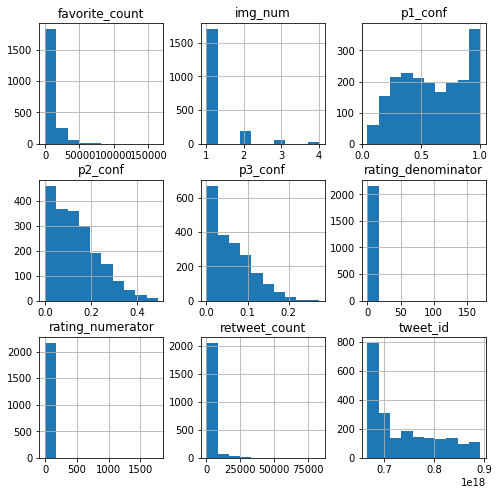

In [10]:
df.hist(figsize=(8, 8));

### Insight 1

What kind of dog has more retweets and favorites.

In [11]:
df.groupby('dog_stage').sum()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
dog_stage,,,,,,,,,
None,1.347023e+21,24902.0,19382.0,14886404.0,4482346.0,2012.0,996.878392,226.507324,102.936025
doggo,5.959498e+19,889.0,750.0,1340488.0,468787.0,81.0,36.354634,9.912485,3.911219
floofer,7.656406e+18,118.0,100.0,111718.0,38361.0,9.0,4.619160,1.264771,0.467682
pupper,1.687385e+20,2532.0,2340.0,1680550.0,559292.0,264.0,130.253893,27.252383,11.763012
puppo,2.022401e+19,302.0,250.0,546905.0,164742.0,33.0,16.212114,3.095430,1.057526


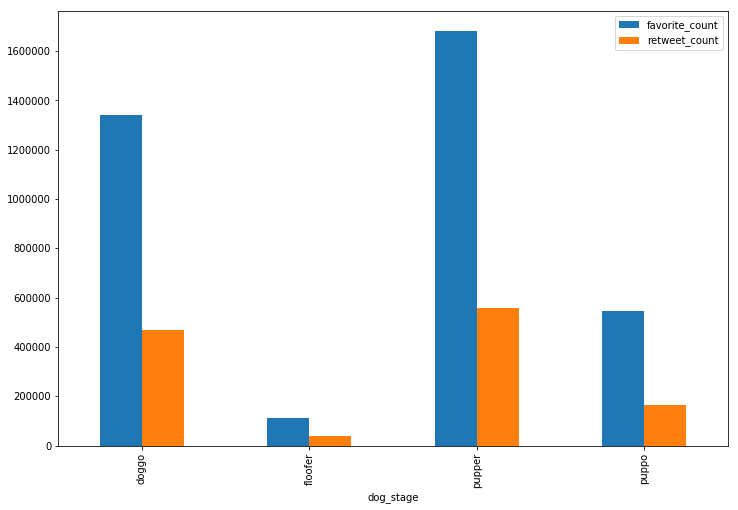

In [12]:
df_dog = df.groupby('dog_stage').sum()[['favorite_count', 'retweet_count']]
df_dog.drop(df_dog.index[[0]]).plot(kind='bar', figsize=(12, 8));

### Insight 2

Correlation between retweets and favorites

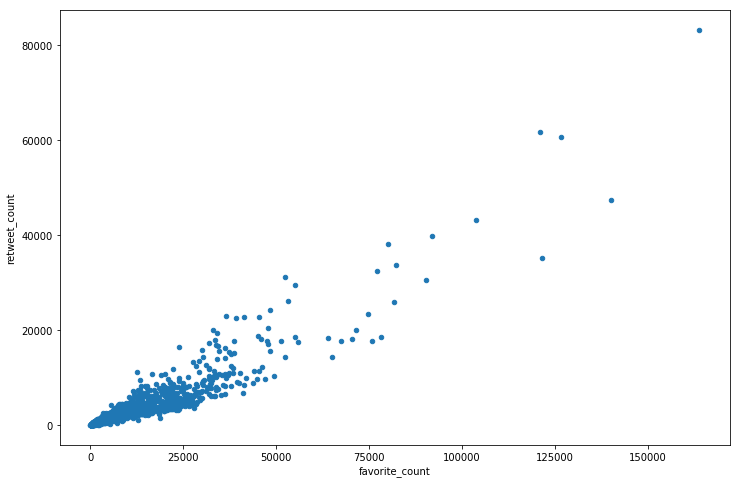

In [13]:
df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', figsize=(12, 8));

### Insight 3

Which type of dog is most prevalent

In [22]:
df_dogg = df.groupby('dog_stage').count()['tweet_id']

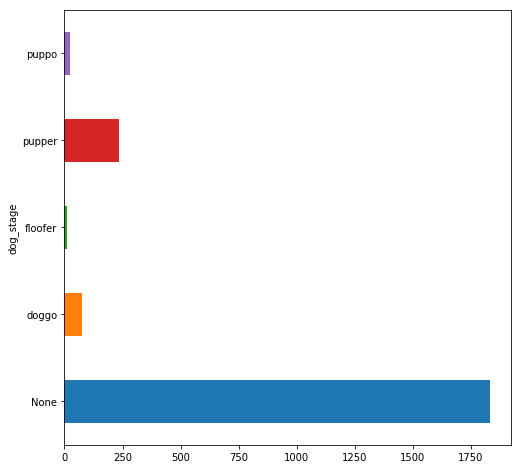

In [28]:
df_dogg.plot(kind='barh', figsize=(8, 8));